In [14]:
# Importowanie bibliotek
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [15]:
t,g,m,k = smp.symbols('t g m k')
the = smp.symbols('theta', cls=smp.Function)
sig = smp.symbols('sigma', cls=smp.Function)
the = the(t)
the_d = smp.diff(the,t)
the_dd= smp.diff(the_d,t)
sig = sig(t)
sig_d = smp.diff(sig,t)
sig_dd= smp.diff(sig_d,t)
r = smp.symbols('r', cls=smp.Function)
l = smp.symbols('l', cls=smp.Function)
r = r(t)
r_d = smp.diff(r,t)
r_dd= smp.diff(r_d,t)
l = l(t)
l_d = smp.diff(l,t)
l_dd= smp.diff(l_d,t)

In [16]:
x1, y1= smp.symbols("x y", cls=smp.Function)
x1= x1(the, r)
y1= y1(the, r)

x2, y2= smp.symbols("X Y", cls=smp.Function)
x2= x2(the, r, sig, l)
y2= y2(the, r,sig, l)

In [17]:
x2

X(theta(t), r(t), sigma(t), l(t))

In [18]:
x1= (1+r)*smp.cos(the)
y1=-(1+r)*smp.sin(the)

x2=(1+r)*smp.cos(the)+(1+l)*smp.cos(sig)
y2=-(1+r)*smp.sin(the)-(1+l)*smp.sin(sig)

In [19]:
T = 1/2*m*(smp.diff(x1,t)**2+smp.diff(y1,t)**2+smp.diff(x2,t)**2+smp.diff(y2,t)**2)
V = m*g*(y1+y2)+1/2*k*(r**2+l**2)
L=T-V

In [20]:
LE1 = smp.diff(L, the) - smp.diff(smp.diff(L,the_d),t)
LE1 = LE1.simplify()

LE2 = smp.diff(L, sig) - smp.diff(smp.diff(L,sig_d),t)
LE2 = LE2.simplify()

LE3 = smp.diff(L, r) - smp.diff(smp.diff(L,r_d),t)
LE3 = LE3.simplify()

LE4 = smp.diff(L, l) - smp.diff(smp.diff(L,l_d),t)
LE4 = LE4.simplify()

In [21]:
solutions = smp.solve([LE1,LE2,LE3,LE4], (the_dd,sig_dd,r_dd,l_dd))

In [22]:
dwdt_f = smp.lambdify((m,k,g,the,sig,r,l,the_d,sig_d,r_d,l_d),solutions[the_dd])
dthedt_f = smp.lambdify(the_d, the_d)

dedt_f = smp.lambdify((m,k,g,the,sig,r,l,the_d,sig_d,r_d,l_d),solutions[sig_dd])
dsigdt_f = smp.lambdify(sig_d,sig_d)

dvdt_f = smp.lambdify((m,k,g,the,sig,r,l,the_d, sig_d,r_d,l_d),solutions[r_dd])
drdt_f = smp.lambdify(r_d,r_d)

dudt_f = smp.lambdify((m,k,g,the,sig,r,l,the_d, sig_d,r_d,l_d),solutions[l_dd])
dRdt_f = smp.lambdify(l_d,l_d)

In [33]:
def dSdt(S,t):
    the, w, sig, e, r, v, R, u =S 
    return [
        dthedt_f(w),
        dwdt_f(m,k,g,the,sig,r,R,w,e,v,u),
        dsigdt_f(e),
        dedt_f(m,k,g,the,sig,r,R,w,e,v,u),
        drdt_f(v),
        dvdt_f(m,k,g,the,sig,r,R,w,e,v,u),
        dRdt_f(u),
        dudt_f(m,k,g,the,sig,r,R,w,e,v,u)
    ]

In [34]:
def dS2dt(S,t):
    the, w, sig, e, r, v, R, u =S 
    return [
        S[1],
        dwdt_f(m,k,g,the,sig,r,R,w,e,v,u),
        S[3],
        dedt_f(m,k,g,the,sig,r,R,w,e,v,u),
        S[5],
        dvdt_f(m,k,g,the,sig,r,R,w,e,v,u),
        S[7],
        dudt_f(m,k,g,the,sig,r,R,w,e,v,u)
    ]

In [35]:
t= np.linspace(0,20,1000)
g=9.81
m=1
k=10
A = [0,0,0,0,0,0,0,0]
ans = odeint(dSdt, y0=A, t=t)
ans2 = odeint(dS2dt, y0=A, t=t)

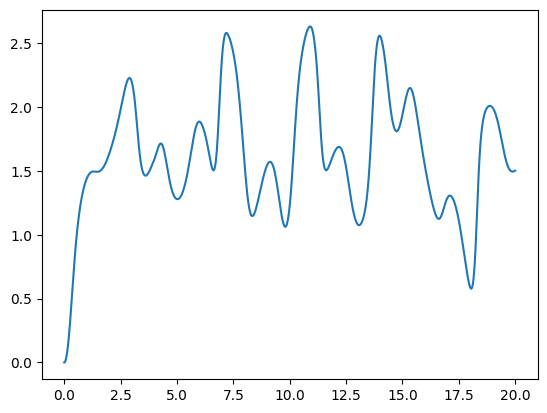

In [39]:
#plt.plot(t,ans.T[0])
plt.plot(t, ans2.T[0])

In [40]:
def get(the,sig,r,l):
    return ((1+r)*np.cos(the),-(1+r)*np.sin(the),(1+r)*np.cos(the)+(1+l)*np.cos(sig),-(1+r)*np.sin(the)-(1+l)*np.sin(sig))

In [41]:
x1,y1,x2,y2 = get(ans.T[0], ans.T[2], ans.T[4],ans.T[6])

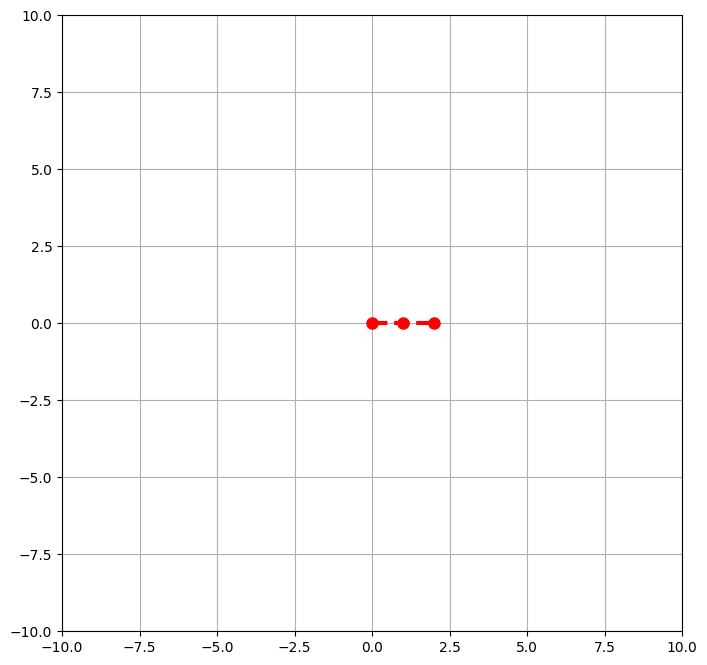

In [42]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-10, 10)
ax.set_xlim(-10,10)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen2.gif',writer='pillow',fps=50)